<a href="https://colab.research.google.com/github/FGalvao77/-Arvores-de-decisao-analise-aprofundada-da-estrutura-de-classificacao/blob/main/%C3%81rvores_de_decis%C3%A3o_an%C3%A1lise_aprofundada_da_estrutura_de_classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Árvores de decisão: análise aprofundada da estrutura de classificação**
---
---

In [1]:
import pandas as pd
import numpy as np
import warnings

from sklearn.datasets import load_iris

warnings.filterwarnings('ignore')

In [2]:
iris = load_iris()

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# X, y = load_iris(return_X_y=True, as_frame=True)

X = iris.data
y = iris.target

In [4]:
print(f'Nº of oservations:\n{X.shape[0]}\n')
print(f'Nº of features:\n{X.shape[1]}\n')
print(f'Features name:\n{iris.feature_names}\n')
print(f'Classes to predict:\n{np.unique(y)}\n')
print(f'Traget names:\n{iris.target_names}\n')

Nº of oservations:
150

Nº of features:
4

Features name:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Classes to predict:
[0 1 2]

Traget names:
['setosa' 'versicolor' 'virginica']



In [5]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
y[:5]

array([0, 0, 0, 0, 0])

In [7]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [8]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
df = pd.DataFrame(
    data=iris.data, columns=[iris.feature_names]
)

df['target'] = iris.target

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
# pd.options.display.float_format = '{:, .2f}'.format
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
from sklearn.model_selection import train_test_split as tts 

In [14]:
Xtrain, Xval, ytrain, yval = tts(
    X, y, test_size=0.3, random_state=1522, stratify=y
)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
decTree_model = DecisionTreeClassifier(
    max_leaf_nodes=3, random_state=1522
)

decTree_model

DecisionTreeClassifier(max_leaf_nodes=3, random_state=1522)

In [17]:
decTree_model.fit(Xtrain, ytrain)

print(decTree_model.score(Xtrain, ytrain))
print(decTree_model.score(Xval, yval))

0.9714285714285714
0.9333333333333333


In [18]:
from sklearn.metrics import accuracy_score as acc

In [19]:
y_predTrain = decTree_model.predict(Xtrain)

In [20]:
acc(y_true=ytrain, y_pred=y_predTrain)

0.9714285714285714

In [21]:
y_predVal = decTree_model.predict(Xval)

In [22]:
acc(y_true=yval, y_pred=y_predVal)

0.9333333333333333

In [23]:
print(f'Probabilities:\n{decTree_model.predict_proba(Xval[0].reshape(1, -1))}\n')
print(f'Index of the max value:\n{np.argmax(decTree_model.predict_proba(Xval[0].reshape(1, -1)))}\n')

Probabilities:
[[0.         0.92105263 0.07894737]]

Index of the max value:
1



In [24]:
y_predVal[0] 

1

In [25]:
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from pylab import rcParams

%matplotlib inline
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = 10, 7

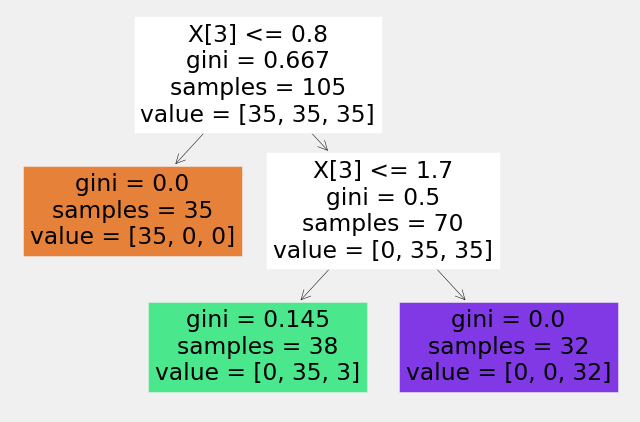

In [26]:
plot_tree(decision_tree=decTree_model, filled=True)
plt.show()

In [27]:
Xtrain.shape[0]

105

In [28]:
df_train = pd.DataFrame(
    data=Xtrain, columns=iris.feature_names
)

df_train['target'] = ytrain

In [29]:
df_train.groupby(by=['target'])[['sepal length (cm)']].count()

,sepal length (cm)
target,
0,35
1,35
2,35


In [30]:
def compute_proportion_class(df:str) -> str:
    df_proba = df.groupby(by=['target'])[['target']].count() / df.groupby(['target'])\
                                                                          ['target'].count().sum()

    df_proba.columns = ['proba']
    df_proba['proba^2'] = df_proba['proba'] ** 2

    return df_proba

In [31]:
df_proba = compute_proportion_class(df_train)

df_proba

,proba,proba^2
target,,
0,0.333333,0.111111
1,0.333333,0.111111
2,0.333333,0.111111


In [32]:
gini_index = 1 -df_proba['proba^2'].sum()

gini_index

0.6666666666666667

In [33]:
df_train.loc[df_train.iloc[:, 3] <= 0.8, :].shape[0]

35

In [34]:
df_train.loc[df_train.iloc[:, 3] <= 0.8, :]['target'].unique()

array([0])

In [35]:
df_train.loc[df_train.iloc[:, 3] <= 0.8, :]\
            .groupby(by=['target'])[['target']]\
            .count().rename(columns={'target': 'count'})

,count
target,
0,35


In [36]:
df_train.loc[df_train.iloc[:, 3] > 0.8, :].shape[0]

70

In [37]:
df_train.loc[df_train.iloc[:, 3] > 0.8, :].groupby(by=['target'])[['target']].count()

,target
target,
1,35
2,35


In [38]:
df_right = df_train.loc[df_train.iloc[:, 3] > 0.8, :]

In [39]:
df_proba = compute_proportion_class(df_right)

df_proba

,proba,proba^2
target,,
1,0.5,0.25
2,0.5,0.25


In [40]:
gini_index = 1 -df_proba['proba^2'].sum()

gini_index

0.5

In [41]:
from mlxtend.plotting import plot_decision_regions

In [42]:
Xtrain_plot = Xtrain[:, [0, 2]]

clf_plot = DecisionTreeClassifier(max_leaf_nodes=3, random_state=1522)
clf_plot.fit(Xtrain_plot, ytrain)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=1522)

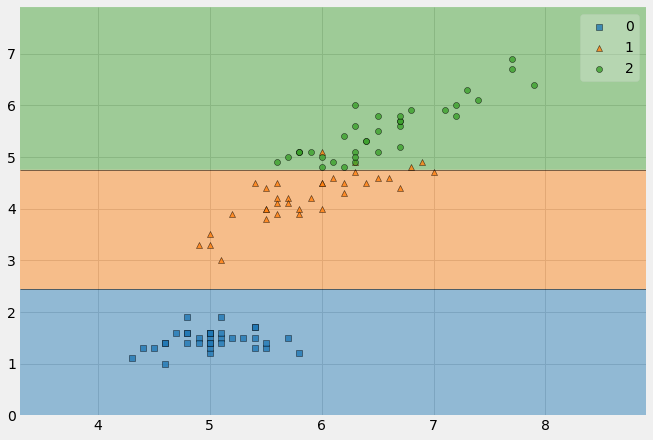

In [43]:
plot_decision_regions(Xtrain_plot, ytrain, clf_plot);

In [44]:
decTree_model.tree_.node_count

5

In [45]:
decTree_model.tree_.n_leaves

3

In [46]:
decTree_model.tree_.children_left

array([ 1, -1,  3, -1, -1], dtype=int64)

In [47]:
decTree_model.tree_.children_right

array([ 2, -1,  4, -1, -1], dtype=int64)

In [48]:
decTree_model.tree_.feature

array([ 3, -2,  3, -2, -2], dtype=int64)

In [49]:
decTree_model.tree_.threshold

array([ 0.80000001, -2.        ,  1.69999999, -2.        , -2.        ])

In [50]:
decTree_model.tree_.n_node_samples

array([105,  35,  70,  38,  32], dtype=int64)

In [51]:
decTree_model.tree_.impurity

array([0.66666667, 0.        , 0.5       , 0.14542936, 0.        ])

In [52]:
sample_id = 0

print(f'First sample features in the teste set: {Xval[sample_id].reshape(1, -1)}')

First sample features in the teste set: [[5.6 2.9 3.6 1.3]]


In [53]:
predict_class = decTree_model.predict(Xval[sample_id].reshape(1,- 1))

# print('The predict class for the sample', sample_id, ":", predict_class)
print(f'The predict class for the sample {sample_id}: {predict_class}')

The predict class for the sample 0: [1]


In [54]:
leaf_id = decTree_model.apply(Xval[sample_id].reshape(1, -1))

# print('The final leaf in wich the observation falls', leaf_id)
print(f'The final leaf in wich the observation falls {leaf_id}')

The final leaf in wich the observation falls [3]


In [55]:
node_index = decTree_model.tree_.n_leaves

type(node_index)

numpy.int64

In [56]:
for idx, node_id in enumerate(range(node_index)):
    is_leaf = "It's not a leaf"
    idx_feature = decTree_model.tree_.feature[node_id]
    majority_class = None

    if decTree_model.tree_.feature[node_id] == -2:
        is_leaf = "It's a leaf"
        majority_class = np.argmax(decTree_model.tree_.value[node_id])

    if node_id in decTree_model.tree_.children_left:
        sens_leave = 'Left Node'
    elif node_id in decTree_model.tree_.children_right:
        sens_leave = 'Right Node'
    else:
        sens_leave = 'Root Node'

    to_print = majority_class

    if majority_class == None:
        print(
            '\nStep', idx, '\n',
            'We are in the', sens_leave,\
            ', node_id=', node_id, '|', is_leaf,\
            '| Best feature idx=', idx_feature,\
            '| Nº of samples per class', decTree_model.tree_.value[node_id]
        )

    else:
        print(
            '\nStep', idx, '\n',
            'We are in the', sens_leave,\
            ', node_id=', node_id, '|', is_leaf,\
            '| Nº of samples per class', decTree_model.tree_.value[node_id],\
            ', majority class=predicted value', np.argmax(a=decTree_model.tree_.value[node_id])
        )


Step 0 
 We are in the Root Node , node_id= 0 | It's not a leaf | Best feature idx= 3 | Nº of samples per class [[35. 35. 35.]]

Step 1 
 We are in the Left Node , node_id= 1 | It's a leaf | Nº of samples per class [[35.  0.  0.]] , majority class=predicted value 0

Step 2 
 We are in the Right Node , node_id= 2 | It's not a leaf | Best feature idx= 3 | Nº of samples per class [[ 0. 35. 35.]]


In [57]:
from sklearn.datasets import load_iris

In [58]:
X = iris.data
y = iris.target

In [59]:
from sklearn.model_selection import train_test_split as tts 

In [60]:
Xtrain, Xval, ytrain, yval = tts(
    X, y, test_size=0.3, random_state=1522, stratify=y
)

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
decTree_model = DecisionTreeClassifier(
    max_leaf_nodes=3, random_state=1522
)

decTree_model

DecisionTreeClassifier(max_leaf_nodes=3, random_state=1522)

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
parameters = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_leaf': [10, 5, 1],
    'max_leaf_nodes': [3, 4, 5, 7, 10]
}

parameters

{'max_depth': [2, 3, 4, 5, 6],
 'min_samples_leaf': [10, 5, 1],
 'max_leaf_nodes': [3, 4, 5, 7, 10]}

In [65]:
search = GridSearchCV(decTree_model, parameters)

search

GridSearchCV(estimator=DecisionTreeClassifier(max_leaf_nodes=3,
                                              random_state=1522),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'max_leaf_nodes': [3, 4, 5, 7, 10],
                         'min_samples_leaf': [10, 5, 1]})

In [66]:
search.fit(Xtrain, ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(max_leaf_nodes=3,
                                              random_state=1522),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'max_leaf_nodes': [3, 4, 5, 7, 10],
                         'min_samples_leaf': [10, 5, 1]})

In [67]:
best_params = search.best_params_

best_params

{'max_depth': 3, 'max_leaf_nodes': 4, 'min_samples_leaf': 1}

In [68]:
search.best_score_

0.980952380952381

In [69]:
search.best_estimator_

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, random_state=1522)

In [70]:
decTree_bestParams = search.best_estimator_

decTree_bestParams

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, random_state=1522)

In [71]:
decTree_bestParams.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, random_state=1522)

In [72]:
decTree_bestParams.score(Xtrain, ytrain)

0.9904761904761905

In [73]:
y_predict = decTree_bestParams.predict(Xval)

In [74]:
from sklearn.metrics import accuracy_score as acc

In [75]:
print(f'[VALIDATION DATA] Score   : {round(decTree_bestParams.score(X=Xval, y=yval), 4)}')
print(f'[VALIDATION DATA] Accuracy: {round(acc(y_true=yval, y_pred=y_predict), 4)}')

[VALIDATION DATA] Score   : 0.9556
[VALIDATION DATA] Accuracy: 0.9556


In [76]:
from mlxtend.plotting import plot_decision_regions

In [77]:
X = iris.data[:, [0, 2]]
y = iris.target

In [78]:
# Xtrain_plot = Xtrain[:, [0, 2]]

clf_plot = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, random_state=1522)
clf_plot.fit(X, y)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, random_state=1522)

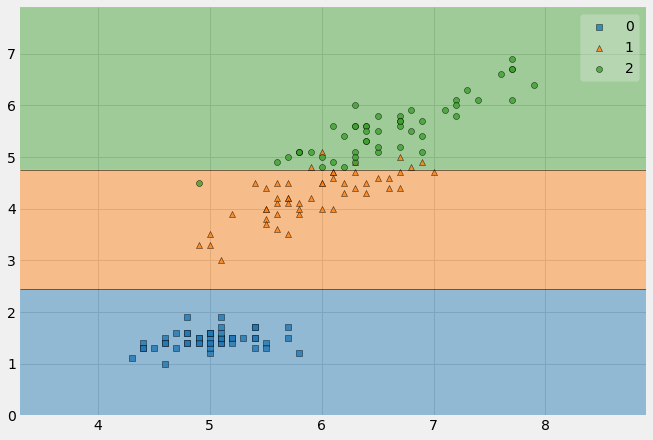

In [79]:
plot_decision_regions(X, y, clf_plot);

In [80]:
%whos

Variable                   Type                      Data/Info
--------------------------------------------------------------
DecisionTreeClassifier     ABCMeta                   <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
GridSearchCV               ABCMeta                   <class 'sklearn.model_sel<...>on._search.GridSearchCV'>
X                          ndarray                   150x2: 300 elems, type `float64`, 2400 bytes
Xtrain                     ndarray                   105x4: 420 elems, type `float64`, 3360 bytes
Xtrain_plot                ndarray                   105x2: 210 elems, type `float64`, 1680 bytes
Xval                       ndarray                   45x4: 180 elems, type `float64`, 1440 bytes
acc                        function                  <function accuracy_score at 0x7efc505a9f70>
best_params                dict                      n=3
clf_plot                   DecisionTreeClassifier    DecisionTreeClassifier(ma<...>des=4, random_state=1522)
co

In [81]:
%who_ls 

['DecisionTreeClassifier',
 'GridSearchCV',
 'X',
 'Xtrain',
 'Xtrain_plot',
 'Xval',
 'acc',
 'best_params',
 'clf_plot',
 'compute_proportion_class',
 'decTree_bestParams',
 'decTree_model',
 'df',
 'df_proba',
 'df_right',
 'df_train',
 'gini_index',
 'idx',
 'idx_feature',
 'iris',
 'is_leaf',
 'leaf_id',
 'load_iris',
 'majority_class',
 'node_id',
 'node_index',
 'np',
 'parameters',
 'pd',
 'plot_decision_regions',
 'plot_tree',
 'plt',
 'predict_class',
 'rcParams',
 'sample_id',
 'search',
 'sens_leave',
 'to_print',
 'tts',
 'warnings',
 'y',
 'y_predTrain',
 'y_predVal',
 'y_predict',
 'ytrain',
 'yval']